# Performance Assessment D207

Ali Zaheer
azaheer@wgu.edu

### Part A: Describe a real-world organizational situation or issue in the Data Dictionary you chose, by doing the following:

#### A1. Provide one question that is relevant to your chosen data set. You will answer this question later in the task through an analysis of the cleaned data, using one of the following techniques: chi-square, t-test, or analysis of variance (ANOVA).

Which customer and features are at high risk of the churn? 

#### A2.  Explain how stakeholders in the organization could benefit from an analysis of the data.

The stakeholders can review the data provided by the analysis and create incentives to keep the customers that are likley to terminate their contracts with the company. This will lead to a lower chrun rate.

#### A3.  Identify all the data in your data set that are relevant to answering your question in part A1.

I will use the categorical data in the 'Churn' columns which is 'Yes' or 'No' format to identify what type of relationship exists with the features. The feature coloumns captures ordinal responses to an eight-question survey asking customers to rate the importance of various factors/surfaces on a scale of 1 to 8.

### B.  Describe the data analysis by doing the following:
#### B1.  Using one of the following techniques, write code (in either Python or R) to run the analysis of the data set:

I will be using the 'chi-square' of independence.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
%matplotlib inline


#from sklearn.svm import OneClassSVM
#from sklearn.preprocessing import scale
#from sklearn.decomposition import PCA
#from icecream import ic
#from scipy import stats

In [2]:
# Load data set
df = pd.read_csv('dataSet/churn_clean.csv')

In [3]:
# display data set with all the columns
df.head(n=3)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3


In [4]:
# Amend columns with no names
df = df.rename(columns=({ 'Item1': 'Timely_Response', 'Item2':'Timely_Fixes', 'Item3':'Timely_Replacements', 
                         'Item4':'Reliability', 'Item5':'Options', 'Item6':'Respectful_Response',
                         'Item7':'Courteous_Exchange', 'Item8':'Evidence_of_active_listening'}))

In [5]:
churn_calc = df[['Churn','Timely_Response', 'Timely_Fixes','Timely_Replacements',
            'Reliability', 'Options', 'Respectful_Response','Courteous_Exchange','Evidence_of_active_listening']]

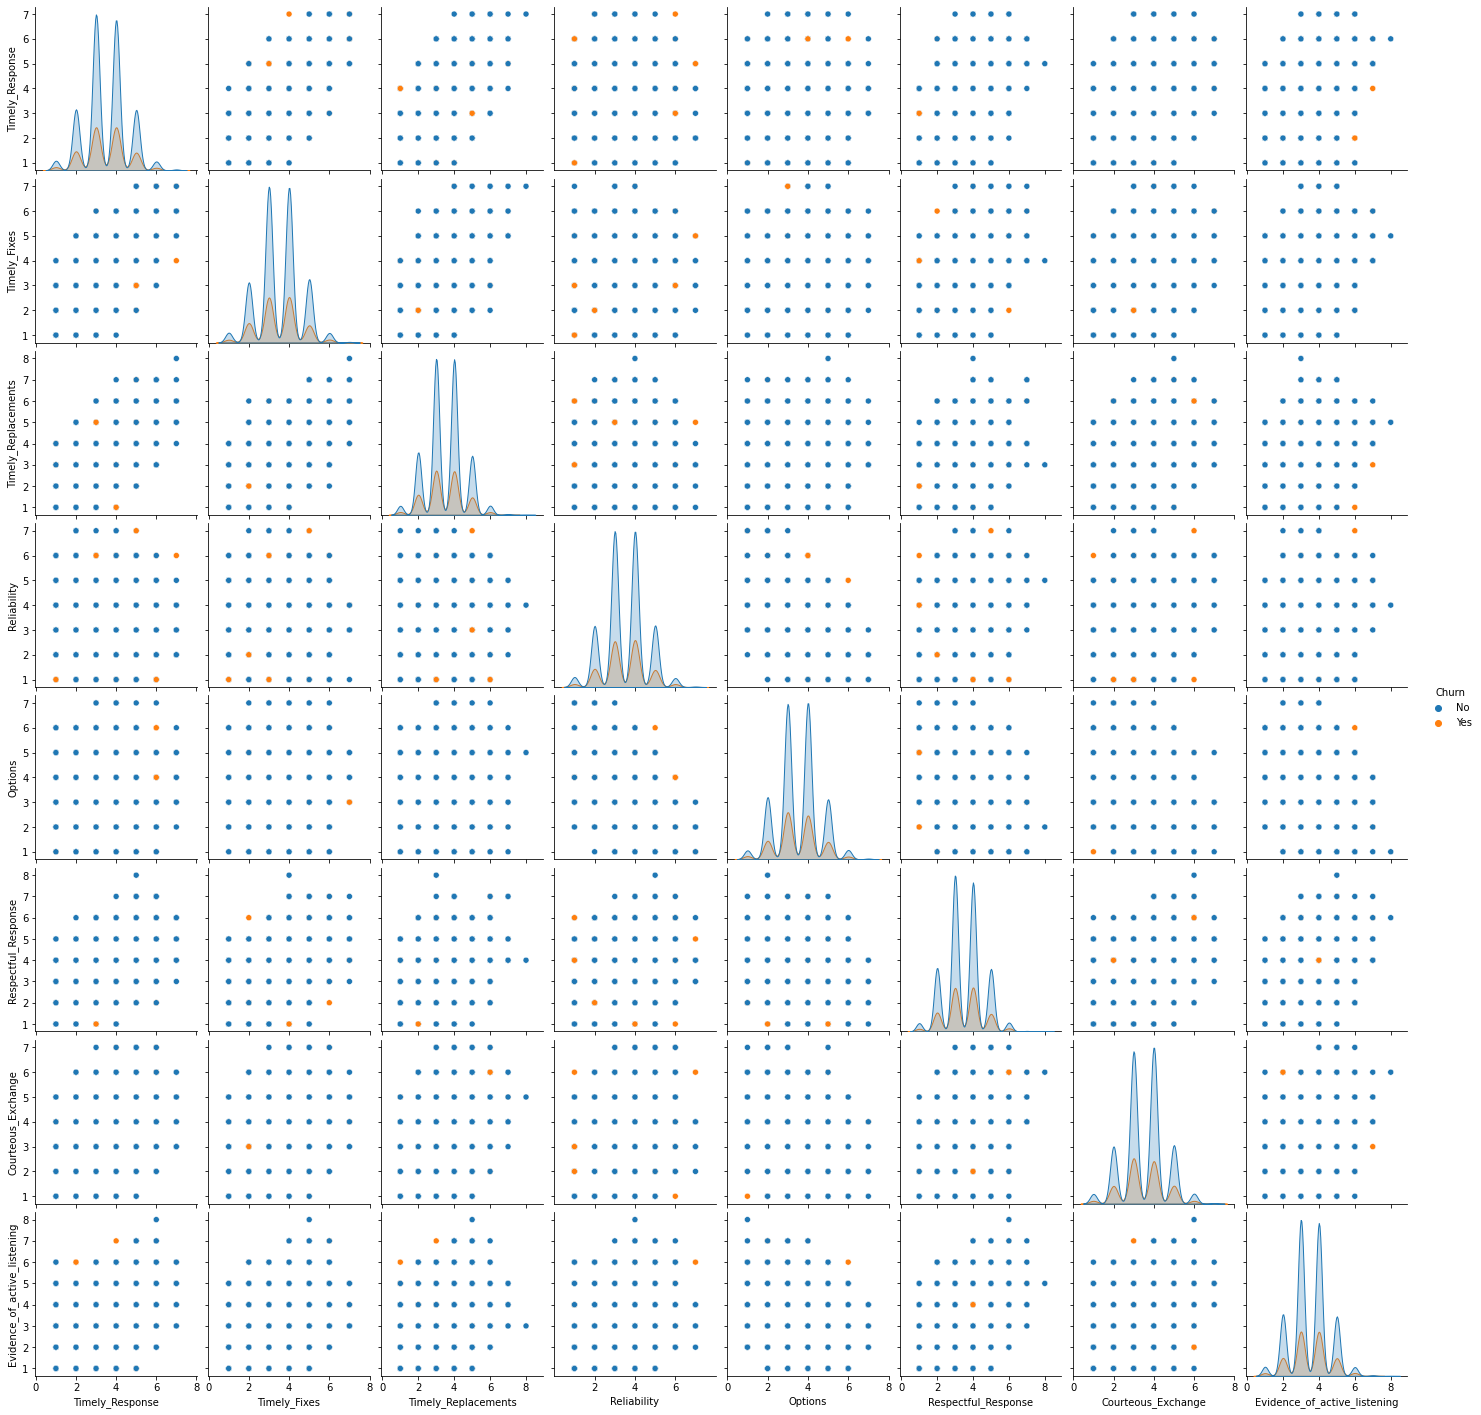

In [6]:
# Pairplot view of the data set
sns.pairplot(churn_calc, hue='Churn')

/Users/alizaheer/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:298: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)


<AxesSubplot:>

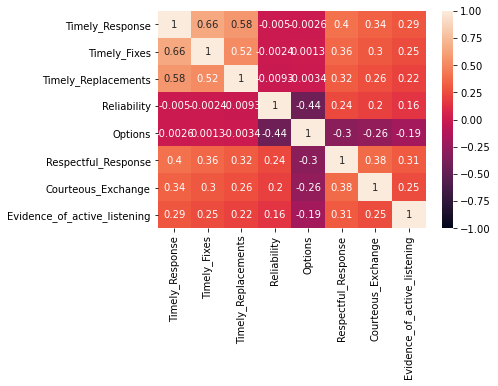

In [7]:
# Correlation heatmap
sns.heatmap(churn_calc.corr(), vmin=-1, vmax=1, Cmap = sns.diverging_palette(10, 400, as_cmap=True), annot=True)

In [8]:
# View of columns being calculated
chi_sqr = churn_calc[['Churn','Respectful_Response']]
pd.set_option('display.max_columns', None)
chi_sqr.head()

,Churn,Respectful_Response
0,No,4
1,Yes,3
2,No,3
3,No,4
4,Yes,4


In [9]:
# Contingency table (Pandas crosstab view)
churnByArea = pd.crosstab(chi_sqr['Churn'], chi_sqr['Respectful_Response'], margins=True, margins_name= "Total")
churnByArea

Respectful_Response,1,2,3,4,5,6,7,8,Total
Churn,,,,,,,,,
No,136,1041,2557,2436,1024,146,9,1,7350
Yes,54,386,888,897,358,64,3,0,2650
Total,190,1427,3445,3333,1382,210,12,1,10000


#### B2.  Provide the output and the results of any calculations from the analysis you performed.

In [10]:
# Chi-squared
chi2, p_value, dof, expected = chi2_contingency(churnByArea)
print('Chi-square Stastics: %0.3f and P-Value: %0.3f' %(chi2, p_value))

print (dof)

Chi-square Stastics: 4.129 and P-Value: 0.999
16


#### B3.  Justify why you chose this analysis technique.

Chi-squared was used because 'churn' is non-parametric boolean data store as categorical i.e. Yes or No and the feature is ordinal type i.e capturing customer feedback on 1-8 scale.

### C. Identify the distribution of two continuous variables and two categorical variables using univariate statistics from your cleaned and prepared data. 

#### C1.	Represent your findings in Part C, visually as part of your submission.
 
Note: To draw a graph or visualization, you may use one or a combination of the following:
- A spreadsheet program, such as Excel (*.xls)
- A graphics program, such as Paint (*.jpeg, *.gif)
- A word-processing program, such as Word (*.rtf) 
- A scanned hand-drawn graph (*.jpeg, *.gif)

### Continuous variables
    1. Outage_sec_perweek
    2. Income

### Categorical variables
    1. State
    2. Churn


In [11]:
con_cat_data_uni = df[['Outage_sec_perweek','Income','State', 'Churn']]

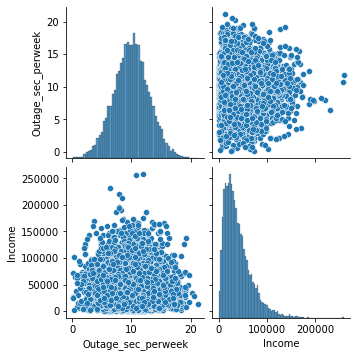

In [12]:
sns.pairplot(con_cat_data_uni)
plt.savefig('univariate_two_continuous_variables_&_two_categorical_variables.jpg')

### D.  Identify the distribution of two continuous variables and two categorical variables using bivariate statistics from your cleaned and prepared data.

#### D1.	Represent your findings in Part D, visually as part of your submission.
 
Note: To draw a graph or visualization, you may use one or a combination of the following:
- A spreadsheet program, such as Excel (*.xls)
- A graphics program, such as Paint (*.jpeg, *.gif)
- A word-processing program, such as Word (*.rtf) 
- A scanned hand-drawn graph (*.jpeg, *.gif)

### Continuous variables
    1. MonthlyCharge
    2. Bandwidth_GB_Year

### Categorical variables
    1. Timely_Response
    2. Churn



In [13]:
con_data_bi = df[['MonthlyCharge','Bandwidth_GB_Year']]
cat_data_bi = df[['Timely_Response','Churn']]

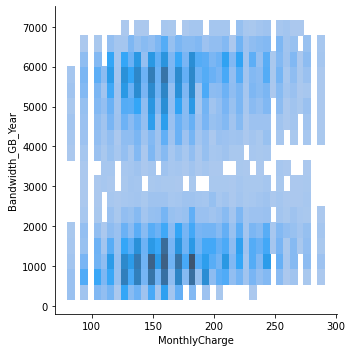

In [14]:
sns.displot(con_data_bi, x='MonthlyCharge', y='Bandwidth_GB_Year')
plt.savefig('bivariate_two_continuous_variables.jpg')

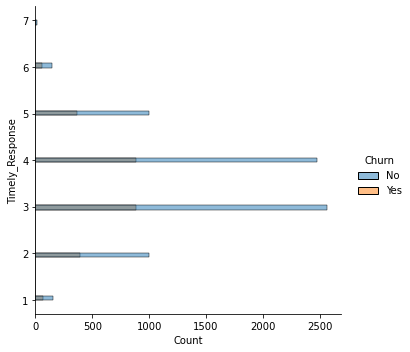

In [15]:
cat_data_bi = df[['Timely_Response','Churn']]
sns.displot(cat_data_bi, y='Timely_Response', hue='Churn')
plt.savefig('bivariate_two_categorical_variables.jpg')

### E.  Summarize the implications of your data analysis by doing the following:
#### E1.  Discuss the results of the hypothesis test.

The p-value '0.999' is greater than Alpha '.05' and it fails to reject the null hypothesis. This means that it cannot be concluded that a significant difference exists. It is not clear if there is a significant relationship between 'Employees communicating with the customer in a respectful manner' and the customer canceling their service with the company.

#### E2.  Discuss the limitations of your data analysis.

The p_value of the compared categorical data is getting closer to 1. Further analysis is needed to get a clear answer. It could perhaps be that we do not have enough data to reach a conclusion and additional data is needed or the data is not properly compiled.


#### E3.  Recommend a course of action based on your results.

The results do not show any correlation concerning churn and respectful response. However, it is always ideal to provide respectful communication to ensure the customers feel safe and it does not give them a reason to leave the company because one employee was not following policy and procedures.


###### G.  Reference the web sources used to acquire segments of third-party code to support the application. Be sure the web sources are reliable.

```{bibliography}
Pandas. (2021). Pandas DataFrames. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html

Get started with references. (2021). Jupyterbook. https://jupyterbook.org/tutorials/references.html#tutorials-references

Marques, A. M. (2020, March 11). How to show all columns / rows of a Pandas Dataframe? Towards Data Science. https://towardsdatascience.com/how-to-show-all-columns-rows-of-a-pandas-dataframe-c49d4507fcf

Crash Course. (2018, August 29). Chi-Square Tests: Crash Course Statistics #29. YouTube. https://www.youtube.com/watch?v=7_cs1YlZoug

Brownlee, J. (2019, October 30). A Gentle Introduction to the Chi-Squared Test for Machine Learning. Machine Learning Mastery. https://machinelearningmastery.com/chi-squared-test-for-machine-learning/
```

###### H.  Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.
```{bibliography}
Chantal D. Larose, & Daniel T. Larose. (2019). Data Science Using Python and R. Wiley.


```